# K-Nearest Neighbors

In [10]:
import random as rd
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt

## Loading Dataset

In [4]:
input_header = {"PROC_TRACEINFO" : "id",
                "OP070_V_1_angle_value": "angle_1",
                "OP090_SnapRingPeakForce_value" : "snap_ring_peak_force",
                "OP070_V_2_angle_value" : "angle_2",
                "OP120_Rodage_I_mesure_value" : "rodage_i",
                "OP090_SnapRingFinalStroke_value" : "snap_ring_final_stroke",
                "OP110_Vissage_M8_torque_value" : "vissage_m8_torque",
                "OP100_Capuchon_insertion_mesure" : "capuchon_insertion",
                "OP120_Rodage_U_mesure_value" : "rodage_u",
                "OP070_V_1_torque_value" : "torque_1",
                "OP090_StartLinePeakForce_value" : "start_line_peak_force",
                "OP110_Vissage_M8_angle_value" : "vissage_m8_angle",
                "OP090_SnapRingMidPointForce_val" : "snap_ring_midpoint_force",
                "OP070_V_2_torque_value" : "torque_2"}
output_header = {"PROC_TRACEINFO" : "id",
                 "Binar OP130_Resultat_Global_v" : "result"}

train_input = pd.read_csv("../data/train_inputs.csv", header=0).rename(columns=input_header)
train_output = pd.read_csv("../data/train_output.csv", header=0).rename(columns=output_header)

In [5]:
train_input_ = train_input[train_input.columns[~train_input.columns.isin(["id", "capuchon_insertion"])]]
X_train, X_test, y_train, y_test = train_test_split(train_input_, train_output["result"], test_size = 0.3, random_state = 123)

## K-NN

In [8]:
# Create model
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

# Prediction
y_pred = knn_model.predict(X_test)
# print(knn_model.predict_proba(X_test))

# Evaluation
metrics.accuracy_score(y_test, y_pred)

0.9910188314823757

/home/fabien/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


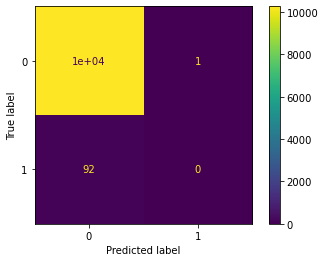

In [9]:
# Compute confusion matrix
M = confusion_matrix(y_test, y_pred)
# tn, fp, fn, tp = M.ravel() # True/False negative/positive

# Plot confusion matrix
plot_confusion_matrix(knn_model, X_test, y_test)
plt.show()

Once again: overfitting due to unbalanced classes !

## K-NN with Balanced Classes

### Remove Individuals

In [11]:
# Copy dataset
train_input_remove = train_input.copy()
train_output_remove = train_output.copy()

# Select index
defect_index = train_output.index[train_output["result"] == 1].tolist()
valid_index = train_output.index[train_output["result"] == 0].tolist()

# Randomly remove some valid individuals
rd.shuffle(valid_index) # Shuffle in order to eliminate "production correlation"
train_input_remove = train_input_remove.iloc[valid_index[:len(defect_index)] + defect_index,:]
train_output_remove = train_output_remove.iloc[valid_index[:len(defect_index)] + defect_index,:]

# Create new datasets
train_input_remove = train_input_remove[train_input_remove.columns[~train_input_remove.columns.isin(["id", "capuchon_insertion"])]]
X_train, X_test, y_train, y_test = train_test_split(train_input_remove, train_output_remove["result"], test_size = 0.3, random_state = 123)

# Create model
knn_balanced_model = KNeighborsClassifier(n_neighbors=3)
knn_balanced_model.fit(X_train, y_train)

# Prediction
y_pred = knn_balanced_model.predict(X_test)

# Evaluation
metrics.accuracy_score(y_test, y_pred)

0.44808743169398907

/home/fabien/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


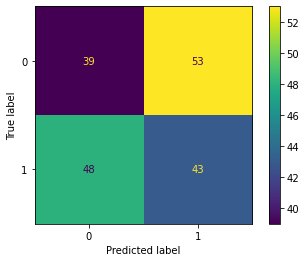

In [12]:
# Compute confusion matrix
M = confusion_matrix(y_test, y_pred)
# tn, fp, fn, tp = M.ravel() # True/False negative/positive

# Plot confusion matrix
plot_confusion_matrix(knn_balanced_model, X_test, y_test)
plt.show()

More realistic...

### Test

In [19]:
best_k = 0
best_accuracy = 0

for k in range(1,200):
    # Create model
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)

    # Prediction
    y_pred = knn_model.predict(X_test)

    # Evaluation
    accuracy = metrics.accuracy_score(y_test, y_pred)

    if accuracy > best_accuracy:
        best_k = k
        best_accuracy = accuracy

best_k
best_accuracy

0.5355191256830601